# LiF10_G1 Analysis 1

## Setup Notes

Please refer to the 'global.ini' file:

```
[paths]
LOCAL_DATA_PATH=LOCAL_DATA_PATH
```

The variable ```LOCAL_DATA_PATH``` should be the path to the directory in which the study data ```LiF10_G1``` directory is saved. <br />
The raw data of ```LiF10_G1``` can be downloaded directly from: https://nhargy.github.io/ .

## Study Notes

4 sample 10x10x10mm LiF fluoride cubes (3 irrad and 1 ctrl) were successively irradiated with a Cobalt-60 source.

**Objectives:**
- Estimate the minimum detectable signal, i.e. the the smallest gamma dose that is detectable through the system.
- Get a value for the gamma response of the LiF cubes, i.e. amount of signal per unit dose (mGray) of gamma.
- Identify the F2 and F3+ centres.


### LiF10_G1 Experimental Structure

irrad -> 1mCi (on Jan 2016) Co-60, centre of 1cm-cubed LiFs 40cm away from source.

Sample | Coll1 | Action | Coll2 | Action | Coll3 | Action | Coll4 | Action | Coll5
--- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Lif10_102 | scan | 15min irrad | scan | Added 500 FELH | scan | 15min irrad | scan | 60min irrad | scan
Lif10_103 | scan | 15min irrad | scan | Added 500 FELH | scan | 15min irrad | scan | 60min irrad | scan
Lif10_104 | scan | 15min irrad | scan | Added 500 FELH | scan | 15min irrad | scan | 60min irrad | scan
Lif10_105 | scan | ctrl | scan | Added 500 FELH | scan | ctrl | scan | ctrl | scan

In [1]:
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h, c, electron_volt
import seaborn as sns
import configparser

# Add project root (parent of notebooks/) to sys.path
sys.path.append(str(Path.cwd().parent))

from src import utils  # Import from the package

# Set Seaborn style globally
sns.set_theme(style="whitegrid") 

In [2]:
config = configparser.ConfigParser()
config.read('global.ini')

LOCAL_DATA_PATH = config["paths"]["LOCAL_DATA_PATH"]

# Get the environment variable
LOCAL_DATA_PATH = os.getenv(LOCAL_DATA_PATH)

data1           = "LiF10_G1"
data1_path      = os.path.join(LOCAL_DATA_PATH, data1) # path/to/LiF10_G1 that is saved locally

sample_arr      = ["L102", "L103", "L104", "L105"]
colls           = [1,2,3,4,5]

t_exp           = 60
t_h2o           = 0.5

# Energy of 445nm photon
photon_energy     = (h * c) / (445e-9) # joules 

# Photons per milli-joule of 445nm
photons_per_joule = 1e-3 / photon_energy # just convert to milli-watts

# Total power in photons per second
power = 12.4 # mW
photons_per_sec   = power * photons_per_joule

435.7
357.6575
349.725
29.56916666666666


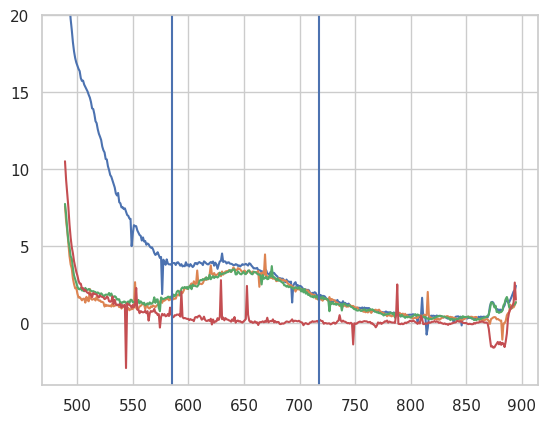

In [26]:

for sample in sample_arr:

    filepath2 = os.path.join(data1_path, f"Coll2/{sample}")
    x, y2 = utils.combine_spectra(filepath2)
    
    filepath1 = os.path.join(data1_path, f"Coll1/{sample}")
    x, y1 = utils.combine_spectra(filepath1)
    
    y = (y2-y1) / (60*4)
    
    plt.plot(x,y)
    c1 = 95
    c2 = 225
    print(np.sum(y[c1:c2]))

plt.axvline(x[c1])
plt.axvline(x[c2])


plt.ylim(-4, 20)
plt.show();

In [22]:
((260 + 291) / 2 ) / 15

18.366666666666667

In [24]:
((1341 + 1343) / 2 ) / 60

22.366666666666667

In [28]:
((357*0.95 + 349*0.95) / 2 ) / 15

22.35666666666667

In [29]:
# ~ 22 ph/sec/min_of_gamma